In [77]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


#Assistance for Parts One, Two, and Three from Chapter 10 of Raschka's "Python Machine Learning"

In [67]:
data = pd.read_csv(r"C:\Users\jazoi\Downloads\housing2.csv")
data.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# PART ONE
# EXPLORATORY DATA ANALYSIS


#Prints total nunmber of rows and columns in the dataset
#Confirmed correct by manual check of the dataset .csv file
#Recycled from my personal HW3 assignment

total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+ str(total_rows))
print("Number of Columns: "+ str(total_cols))

Number of Rows: 506
Number of Columns: 27


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 27 columns):
ATT1       506 non-null float64
ATT2       506 non-null float64
ATT3       506 non-null float64
ATT4       506 non-null float64
ATT5       506 non-null float64
ATT6       506 non-null float64
ATT7       506 non-null float64
ATT8       506 non-null float64
ATT9       506 non-null float64
ATT10      506 non-null float64
ATT11      506 non-null float64
ATT12      506 non-null float64
ATT13      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       452 non-null float64
dtypes: float64(26), int64(1)
mem

In [14]:
#From the information above, some values are missing. To procede, all rows missing values must be dropped (507 to 453)
#Column should stay the same at 27
data.dropna(inplace=True)
data.shape

(452, 27)

In [69]:
data.describe()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,0.518457,0.500422,0.507451,0.498543,0.525487,0.508831,0.501997,0.509998,0.480159,0.501922,...,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,0.283847,0.298752,0.289607,0.294229,0.283387,0.282400,0.287986,0.290160,0.301086,0.294051,...,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000727,0.000321,0.000013,0.001541,0.003970,0.000679,0.003653,0.000525,0.001093,0.000263,...,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.272918,0.235879,0.244897,0.229861,0.283208,0.276366,0.271701,0.257320,0.208171,0.248119,...,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.521326,0.485701,0.526013,0.506543,0.514982,0.509443,0.499804,0.508327,0.465557,0.487129,...,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.770235,0.774921,0.750546,0.757517,0.772218,0.730899,0.756420,0.768465,0.739580,0.771559,...,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,0.995798,0.999265,0.998746,0.995561,0.998635,0.998194,0.999140,0.997083,0.996714,0.999321,...,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [16]:
#Prints correlation between variables
#Recycled from my personal HW3 assignment
print(data.corr())

             ATT1      ATT2      ATT3      ATT4      ATT5      ATT6      ATT7  \
ATT1     1.000000 -0.039391 -0.058470  0.005797 -0.001317 -0.055374 -0.004116   
ATT2    -0.039391  1.000000  0.061480  0.082034 -0.012470 -0.049294 -0.056357   
ATT3    -0.058470  0.061480  1.000000 -0.028767 -0.105727 -0.005063  0.063010   
ATT4     0.005797  0.082034 -0.028767  1.000000  0.038839 -0.050584 -0.053885   
ATT5    -0.001317 -0.012470 -0.105727  0.038839  1.000000 -0.036498  0.014035   
ATT6    -0.055374 -0.049294 -0.005063 -0.050584 -0.036498  1.000000 -0.001369   
ATT7    -0.004116 -0.056357  0.063010 -0.053885  0.014035 -0.001369  1.000000   
ATT8    -0.028384 -0.083957 -0.004596 -0.002858  0.021430 -0.019384 -0.053012   
ATT9     0.019586 -0.070884  0.013224 -0.064144  0.009372 -0.023754  0.019470   
ATT10   -0.070626 -0.047358 -0.030974  0.023446 -0.010690 -0.025847  0.005887   
ATT11    0.016995 -0.018583 -0.130766 -0.054049 -0.008083  0.009586  0.003412   
ATT12   -0.095414 -0.000073 

In [70]:
#Prints covariance between variables
#Recycled from my personal HW3 assignment
print(data.cov())

             ATT1      ATT2      ATT3      ATT4      ATT5      ATT6      ATT7  \
ATT1     0.080569 -0.001376 -0.002687  0.001810  0.000006 -0.001544 -0.000145   
ATT2    -0.001376  0.089253  0.005494  0.008086 -0.001631 -0.002013 -0.004579   
ATT3    -0.002687  0.005494  0.083872 -0.001932 -0.006080 -0.000523  0.004342   
ATT4     0.001810  0.008086 -0.001932  0.086571  0.002115 -0.003125 -0.004046   
ATT5     0.000006 -0.001631 -0.006080  0.002115  0.080308 -0.001463  0.001624   
ATT6    -0.001544 -0.002013 -0.000523 -0.003125 -0.001463  0.079750  0.000382   
ATT7    -0.000145 -0.004579  0.004342 -0.004046  0.001624  0.000382  0.082936   
ATT8    -0.002467 -0.007546 -0.001304  0.000091  0.002065 -0.002127 -0.004516   
ATT9     0.001124 -0.006207 -0.000004 -0.005651 -0.000808 -0.000570 -0.000355   
ATT10   -0.005908 -0.001453 -0.001271  0.000871  0.000477 -0.002360  0.000869   
ATT11    0.000551 -0.000711 -0.011222 -0.002036 -0.002140 -0.000176  0.001759   
ATT12   -0.006898 -0.000855 

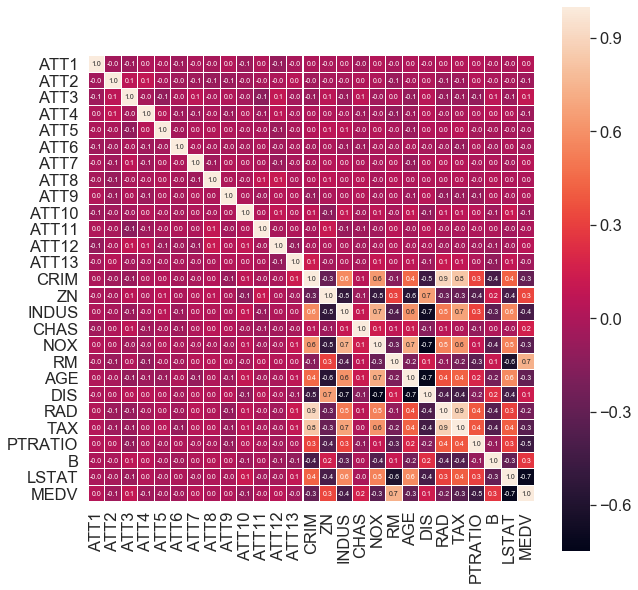

In [71]:
#Generate heatmap

fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm,
                 linewidths = 0.1,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 7},
                 yticklabels=data.columns,
                 xticklabels=data.columns)


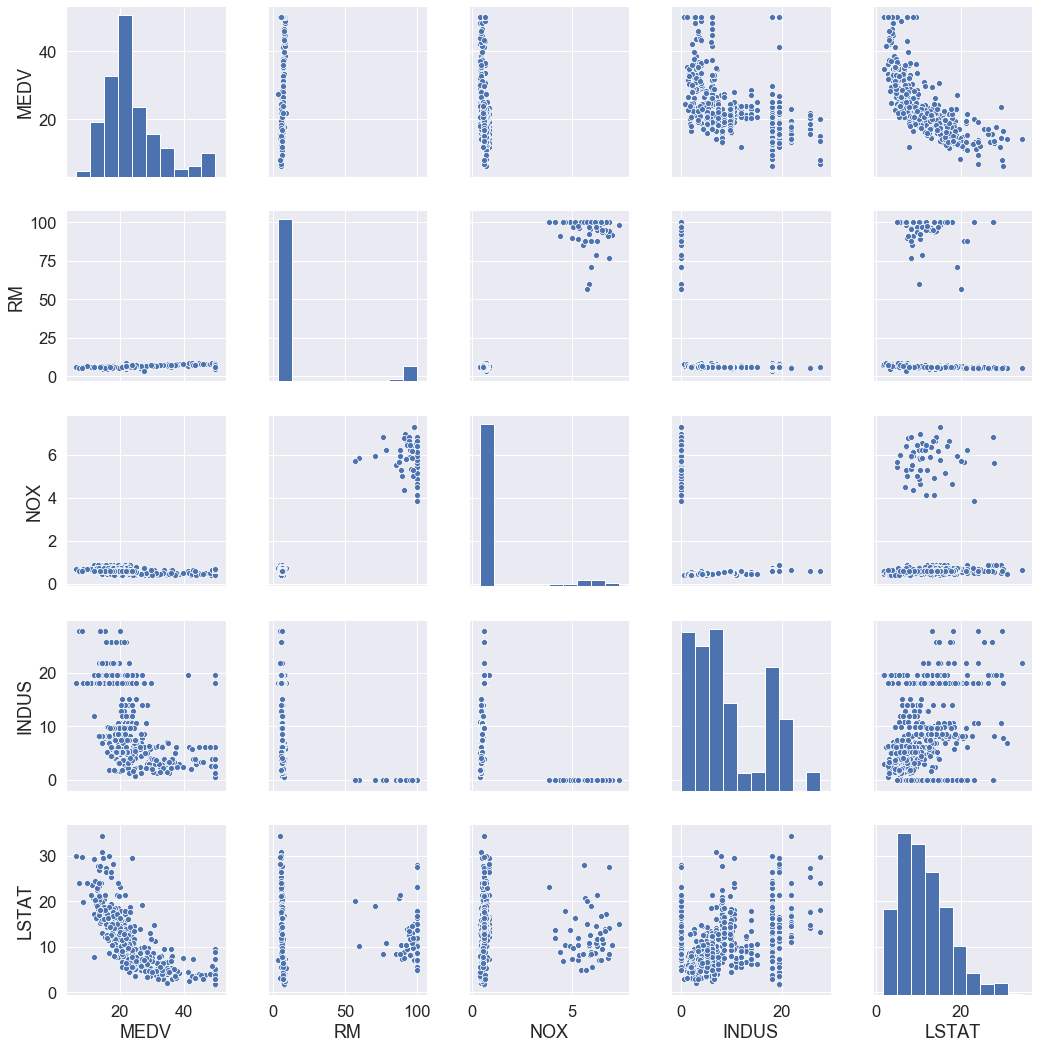

In [73]:
sns.pairplot(data[['MEDV', 'RM', 'NOX', 'INDUS', 'LSTAT']], height = 3)

In [46]:
# PART TWO
# LINEAR REGRESSION

#Plot residual errors 


data2 = pd.read_csv(r"C:\Users\jazoi\Downloads\housing2.csv")
data2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [65]:
data2.shape

(452, 27)

In [81]:
X = data2.iloc[:, :-1].values
y = data2['MEDV'].values

#Assignment details require 80% of data for training set (1-0.8=0.2) and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

#Code below derived from Raschka Ch. 10

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 2.260
Intercept: 20.538


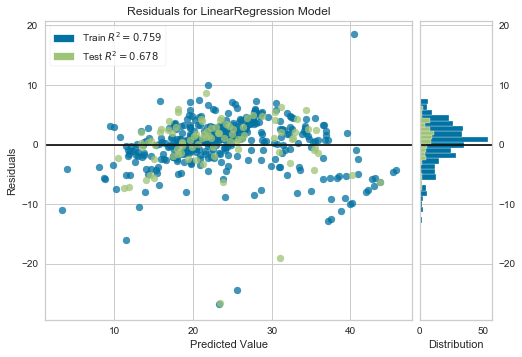

In [84]:
#Assistance provided from https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

# R^2 of the training an testing are shown on the graph

In [91]:
from sklearn.metrics import mean_squared_error

print('Training Data MSE: %.3f' % mean_squared_error(slr.predict(X_train), y_train))
print('Testing Data MSE: %.3f' % mean_squared_error(slr.predict(X_test), y_test))

Training Data MSE: 19.077
Testing Data MSE: 22.321


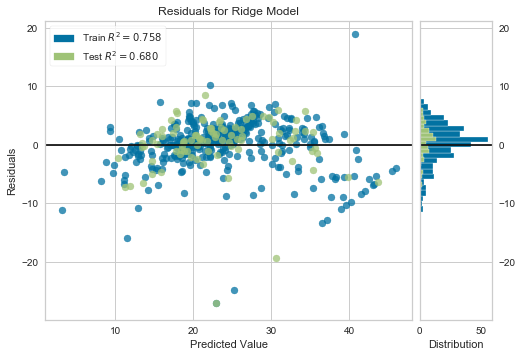

In [92]:
# PART THREE.ONE
# RIDGE REGRESSION

#Assistance provided from https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# R^2 of the training an testing are shown on the graph

In [129]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print ('Ridge Regression Train Score Low Alpha: %.3f' % Ridge_train_score)
print ('Ridge Regression Train Score High Alpha: %.3f' % Ridge_train_score100)
print()
print ('Ridge Regression Test Score Low Alpha: %.3f' % Ridge_test_score)
print ('Ridge Regression Test Score High Alpha: %.3f' % Ridge_test_score100)

Ridge Regression Train Score Low Alpha: 0.759
Ridge Regression Train Score High Alpha: 0.719

Ridge Regression Test Score Low Alpha: 0.678
Ridge Regression Test Score High Alpha: 0.690


In [133]:
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

print('Slope: %.3f' % rr.coef_[0])
print('Intercept: %.3f' % rr.intercept_)

Slope: 2.258
Intercept: 20.456


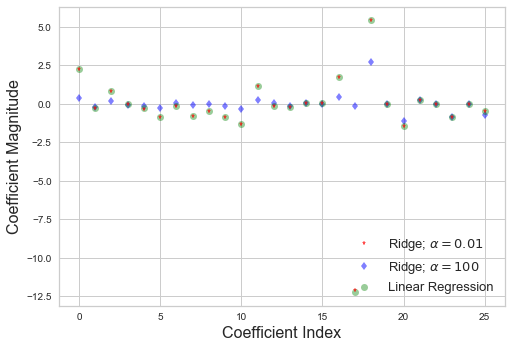

In [138]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [145]:
print('Training Data MSE: %.3f' % mean_squared_error(rr.predict(X_train), y_train))
print('Testing Data MSE: %.3f' % mean_squared_error(rr.predict(X_test), y_test))

Training Data MSE: 19.077
Testing Data MSE: 22.317


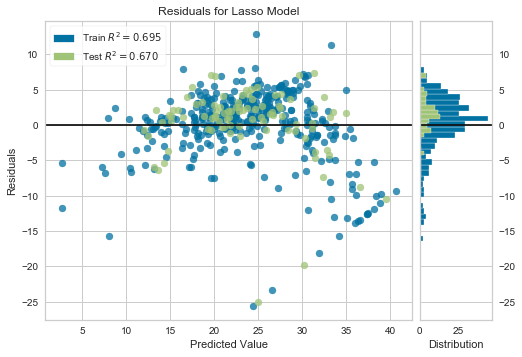

In [137]:
# PART THREE.ONE
# LASSO REGRESSION

#Assistance provided from https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

model2 = Lasso()
visualizer = ResidualsPlot(model2)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# R^2 of the training an testing are shown on the graph

In [136]:
llr = LinearRegression()
llr.fit(X_train, y_train)
lrr = Lasso(alpha=0.01)
lrr.fit(X_train, y_train)
lrr100 = Lasso(alpha=100)
lrr100.fit(X_train, y_train)
train_score=llr.score(X_train, y_train)
test_score=llr.score(X_test, y_test)
Ridge_train_score = lrr.score(X_train,y_train)
Ridge_test_score = lrr.score(X_test, y_test)
Ridge_train_score100 = lrr100.score(X_train,y_train)
Ridge_test_score100 = lrr100.score(X_test, y_test)

print ('Ridge Regression Train Score Low Alpha: %.3f' % Ridge_train_score)
print ('Ridge Regression Train Score High Alpha: %.3f' % Ridge_train_score100)
print()
print ('Ridge Regression Test Score Low Alpha: %.3f' % Ridge_test_score)
print ('Ridge Regression Test Score High Alpha: %.3f' % Ridge_test_score100)

Ridge Regression Train Score Low Alpha: 0.759
Ridge Regression Train Score High Alpha: 0.124

Ridge Regression Test Score Low Alpha: 0.680
Ridge Regression Test Score High Alpha: 0.097


In [162]:
y_train_pred = lrr.predict(X_train)
y_test_pred = lrr.predict(X_test)

print('Slope: %.3f' % lrr.coef_[0])
print('Intercept: %.3f' % lrr.intercept_)

Slope: 2.096
Intercept: 17.896


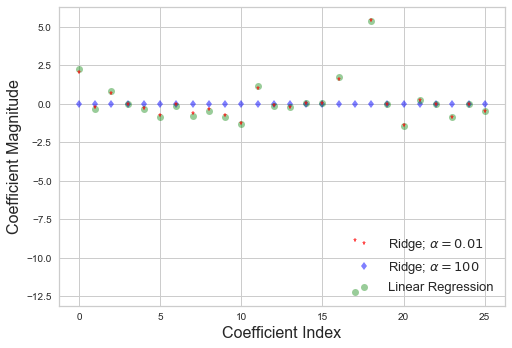

In [140]:
plt.plot(lrr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(lrr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(llr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [146]:
print('Training Data MSE: %.3f' % mean_squared_error(lrr.predict(X_train), y_train))
print('Testing Data MSE: %.3f' % mean_squared_error(lrr.predict(X_test), y_test))

Training Data MSE: 19.127
Testing Data MSE: 22.172


In [154]:
print('I am still in the learning phase of the ridge and lasso regressions, but will continue to investigate further. I plan')
print('on continuting to build familiarity with using sklearn for these datasets')
print()
print('As for the data and results, it is highly depend on the coefficients. In LASSO regression, coefficients can be reduced')
print('based on set parameters. In a ridge regression, the coefficients are not "penalized." This can be shown through')
print('through the varying results. The results show slight changes in R^2 and MSE as we progress to a LASSO regression.')
print('In order to acknowledge BOTH LASSO and ridge, I would continue with testing of ElasticNet, sampled below:')

I am still in the learning phase of the ridge and lasso regressions, but will continue to investigate further. I plan
on continuting to build familiarity with using sklearn for these datasets

As for the data and results, it is highly depend on the coefficients. In LASSO regression, coefficients can be reduced
based on set parameters. In a ridge regression, the coefficients are not "penalized." This can be shown through
through the varying results. The results show slight changes in R^2 and MSE as we progress to a LASSO regression.
In order to acknowledge BOTH LASSO and ridge, I would continue with testing of ElasticNet, sampled below:


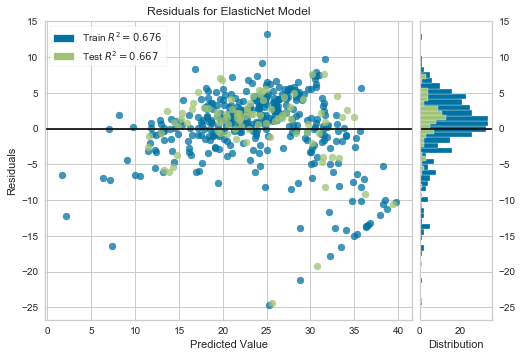

In [156]:
from sklearn.linear_model import ElasticNet

model3 = ElasticNet()
visualizer = ResidualsPlot(model3)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# R^2 of the training an testing are shown on the graph

In [158]:
ellr = LinearRegression()
ellr.fit(X_train, y_train)
elrr = ElasticNet(alpha=0.01)
elrr.fit(X_train, y_train)
elrr100 = ElasticNet(alpha=100) 
elrr100.fit(X_train, y_train)
train_score=ellr.score(X_train, y_train)
test_score=ellr.score(X_test, y_test)
Ridge_train_score = elrr.score(X_train,y_train)
Ridge_test_score = elrr.score(X_test, y_test)
Ridge_train_score100 = elrr100.score(X_train,y_train)
Ridge_test_score100 = elrr100.score(X_test, y_test)

print ('ElasticNet Regression Train Score Low Alpha: %.3f' % Ridge_train_score)
print ('ElasticNet Regression Train Score High Alpha: %.3f' % Ridge_train_score100)
print()
print ('ElasticNet Regression Test Score Low Alpha: %.3f' % Ridge_test_score)
print ('ElasticNet Regression Test Score High Alpha: %.3f' % Ridge_test_score100)

ElasticNet Regression Train Score Low Alpha: 0.757
ElasticNet Regression Train Score High Alpha: 0.144

ElasticNet Regression Test Score Low Alpha: 0.681
ElasticNet Regression Test Score High Alpha: 0.101


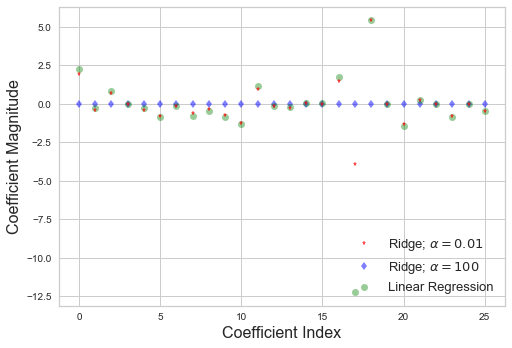

In [160]:
plt.plot(elrr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(elrr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(ellr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [163]:
y_train_pred = elrr.predict(X_train)
y_test_pred = elrr.predict(X_test)

print('Slope: %.3f' % elrr.coef_[0])
print('Intercept: %.3f' % elrr.intercept_)

Slope: 1.956
Intercept: 15.060


In [165]:
print('Training Data MSE: %.3f' % mean_squared_error(elrr.predict(X_train), y_train))
print('Testing Data MSE: %.3f' % mean_squared_error(elrr.predict(X_test), y_test))

Training Data MSE: 19.296
Testing Data MSE: 22.134


In [164]:
print("My name is Jonathan Zoia")
print("My NetID is: jzoia2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jonathan Zoia
My NetID is: jzoia2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
